In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [3]:
from tensorflow.compat.v1.keras import layers
from tensorflow.compat.v1.keras.layers import Lambda, Input, Dense ,Input, Flatten, Multiply, Reshape, concatenate
from tensorflow.compat.v1.keras.losses import mse, binary_crossentropy
from tensorflow.compat.v1.keras.utils import plot_model
import pandas as pd
from tensorflow.compat.v1.keras.optimizers import Adam
from tensorflow.compat.v1.keras import backend as K
from tensorflow.compat.v1.keras.models import Model
from tensorflow.compat.v1.keras.layers import Dense, Activation, Dropout,Conv1D, MaxPooling1D, Conv2DTranspose, BatchNormalization


In [4]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import seaborn as sn
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import os
#import tensorflow as tf
import tensorflow.compat.v1 as tf
from tensorflow.compat.v1 import keras
import umap

In [5]:
from  tensorflow.compat.v1.keras.initializers import glorot_uniform  # Or your initializer of choice

In [6]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [9]:
# Define computing resource
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
tf.Session(config=config)

In [10]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    df_corr = df_corr.abs()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [11]:
def masking(mask_data):
    inputs, outputs_unmasked =mask_data
    mask = tf.math.logical_not(tf.math.equal(inputs, 0))
    mask = tf.cast(mask, dtype=outputs_unmasked.dtype) #convert it to the same data type as the outputs_unmasked
    outputs_masked= outputs_unmasked*mask
    return outputs_masked
    

In [12]:
os.getcwd()

'/Users/jianqiuzhang/Documents/Psychology/duckworth-grit-scale-data'

In [13]:
# load data
#data_read = pd.read_table('/Users/jianqiuzhang/Documents/Psychology/duckworth-grit-scale-data/data.csv')
data_read = pd.read_table('/Users/jianqiuzhang/Documents/Psychology/BIG5/data.csv')

col_name = list(data_read.columns)
data = data_read.iloc[:,col_name.index('E1'):col_name.index('O10')+1]
col_names = list(data.columns)
exp_data = data.values
zeroindex=(exp_data==0)
scaler = StandardScaler()
scaled_exp_data_df=data.copy()
scaled_exp_data_df=pd.DataFrame(scaler.fit_transform(scaled_exp_data_df), columns=data.columns)
#scaled_exp_data_df.info()
df_E=data.iloc[:,col_names.index('E1'):col_names.index('E10')+1]
alphaE=cronbach_alpha(df_E)
df_N=data.iloc[:,col_names.index('N1'):col_names.index('N10')+1]
alphaN=cronbach_alpha(df_N)
df_A=data.iloc[:,col_names.index('A1'):col_names.index('A10')+1]
alphaA=cronbach_alpha(df_A)
df_C=data.iloc[:,col_names.index('C1'):col_names.index('C10')+1]
alphaC=cronbach_alpha(df_C)
df_O=data.iloc[:,col_names.index('O1'):col_names.index('O10')+1]
alphaO=cronbach_alpha(df_O)
print(alphaE,alphaN, alphaA, alphaC, alphaO)
mean_E=df_E.mean(axis=None).mean()
std_E=df_E.std(axis=None).mean()
mean_N=df_N.mean(axis=None).mean()
std_N=df_N.std(axis=None).mean()
mean_A=df_A.mean(axis=None).mean()
std_A=df_A.std(axis=None).mean()
mean_C=df_C.mean(axis=None).mean()
std_C=df_C.std(axis=None).mean()
mean_O=df_O.mean(axis=None).mean()
std_O=df_O.std(axis=None).mean()
print(mean_E,mean_N, mean_A, mean_C, mean_O)
print(std_E,std_N,std_A,std_C,std_O)

0.8925028860332836 0.8676181908621856 0.8374318823930123 0.8115905717403081 0.7954163136458966
3.0765657487702214 3.0951924539783966 3.20477204726406 3.1547492266342103 3.3134793853643694
1.2928915961791714 1.2700498551114758 1.128777598915431 1.190656030164011 1.0525365443394383


In [12]:
df_corr = df_E.corr()
df_corr_abs=df_corr.abs()
#print(df_corr_abs)   

In [13]:
#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_exp_data_df)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(scaled_exp_data_df)
print(kmo_model)


81024.41497975806 0.0
0.9054234836046936


/Users/jianqiuzhang/opt/miniconda3/envs/tf/lib/python3.7/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [14]:
#EXPLORATORY FACTOR ANALYSIS
fa = FactorAnalyzer(10, rotation=None)
fa.fit(scaled_exp_data_df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation=None, rotation_kwargs={},
               use_smc=True)

FactorAnalyzer(rotation=None, rotation_kwargs={})

[8.04739087 4.61635215 3.74835278 3.5534873  2.76351158 1.58107551
 1.33061928 1.0536321  0.96636091 0.92618596 0.89681595 0.863636
 0.84686965 0.80468571 0.78706276 0.73381462 0.72728285 0.71979486
 0.68079937 0.66187492 0.65687516 0.63534022 0.61063383 0.589986
 0.58340323 0.56586203 0.55253249 0.53529905 0.52457406 0.51073325
 0.50291749 0.48971438 0.4872163  0.48273587 0.44980798 0.44781115
 0.43507542 0.42185998 0.41620527 0.40379847 0.39765851 0.37962448
 0.37303034 0.36358606 0.34772164 0.34375232 0.3252576  0.32341044
 0.31183169 0.22214019]
50


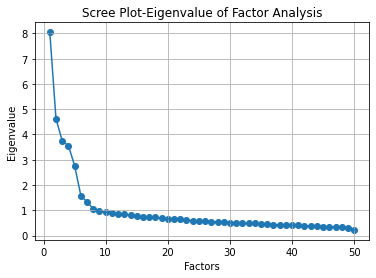

In [103]:
#GET EIGENVALUES
ev=fa.get_eigenvalues()

evarr = np.asarray(ev)
print(evarr[0])

print(len(evarr[0]))
# SCREEPLOT (need pyplot)
x=range(1,51,1)
plt.scatter(x,evarr[0])
plt.plot(x,ev[0])
plt.title('Scree Plot-Eigenvalue of Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('ScreePlotFactorAnalysis.jpeg')
plt.show()

In [104]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(5, rotation="varimax", method='minres', use_smc=True)
fa.fit(scaled_exp_data_df)

#FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
#               method='minres', n_factors=4, rotation='varimax',
 #              rotation_kwargs={}, use_smc=True)

#fa.loadings_
fa.get_communalities()

array([0.45792781, 0.47655609, 0.574223  , 0.51985223, 0.59569448,
       0.40282681, 0.57322217, 0.32521076, 0.39756506, 0.45272984,
       0.4927389 , 0.26416912, 0.42630656, 0.13600463, 0.31935924,
       0.57196964, 0.52209978, 0.57302112, 0.53627259, 0.46888996,
       0.19765662, 0.41310733, 0.27443015, 0.61924604, 0.45107899,
       0.37386156, 0.50225258, 0.36359485, 0.5145036 , 0.30735046,
       0.38545282, 0.30499691, 0.24127463, 0.44673782, 0.41441796,
       0.37202866, 0.29714946, 0.30248763, 0.4047131 , 0.28098438,
       0.35832466, 0.35535989, 0.29904059, 0.25730638, 0.41653373,
       0.2649668 , 0.30159759, 0.3252415 , 0.1951985 , 0.48077802])

In [105]:
#fa.get_eigenvalues()
favar=fa.get_factor_variance()
print(favar)
#fa.get_uniquenesses()
tf=fa.transform(scaled_exp_data_df)
print(tf)

rec=np.dot(tf,fa.loadings_.transpose())
rec.shape


(array([4.98625909, 4.61063454, 3.7664344 , 3.27188219, 3.17310275]), array([0.09972518, 0.09221269, 0.07532869, 0.06543764, 0.06346206]), array([0.09972518, 0.19193787, 0.26726656, 0.3327042 , 0.39616626]))
[[ 1.04765292 -1.87324149  0.5814569   1.30916469  0.40526184]
 [-0.7985163  -0.18777811 -0.14785607  0.93408578 -1.86698226]
 [ 0.63175243  2.35495555  0.13010995  2.11292655  0.74034898]
 ...
 [-0.285236    1.81131105 -1.41471231 -0.90930053 -0.01419889]
 [-0.93542083  1.02767821  0.02279128  1.28060819  0.60935331]
 [-0.77603793  0.65935935 -0.58444618  0.46691354  1.53128958]]


(19719, 50)

In [54]:
corr_arr=[]
for i in range(0,50,1):
  corrnum=np.corrcoef(rec[i,:],scaled_exp_data_df.iloc[i,:])
  corr_arr.append(corrnum[0,1])
  print(corrnum[0,1])
  
 

0.7222532371939697
0.6329013075918247
0.7200983926742982
0.8023715180832156
0.775082154483545
0.8438769571719056
0.769913062593712
0.6940034191935351
0.8957931483364934
0.8282336031597871
0.6604529698548465
0.8168762041426907
0.5148846322285848
0.362148073422408
0.6809749780884351
0.6594952709097166
0.8438769571719056
0.5665080654561637
0.5763510574423407
0.5640099088425029
0.8285249579259643
0.6496224952626357
0.577681013405222
0.6791228169824279
0.8915360965525734
0.4596818819562491
0.49227905155729146
0.6118911228875303
0.655862262722628
0.7655399537205586
0.557289229224823
0.6440955670595933
0.5512319735710459
0.39246254287921406
0.8563873873544074
0.6669296478363286
0.4342253588242273
0.8698971615934785
0.8507062740634155
0.8588057036654142
0.6773209331561728
0.7349662902787204
0.8827611477308099
0.6487645156139569
0.7723250514239751
0.7276574719211019
0.629444309144439
0.7100178456322567
0.7348380595269833
0.9519552235297719


In [55]:
import statistics as stat
meancorr=sum(corr_arr)/len(corr_arr)
print(meancorr)
stdcorr=stat.stdev(corr_arr)
print(stdcorr)

0.6938785653009022
0.1392953862978604


In [50]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
corr_np=np.array(corr_arr)
savetxt('corrFA.csv', corr_np, delimiter=',')

In [44]:

# load numpy array from csv file
from numpy import loadtxt
# load array
corr_np2 = loadtxt('corrFA.csv', delimiter=',')
# print the array
print(corr_np2)

[0.72931563 0.63368831 0.76112804 0.8065649  0.78427791 0.86099935
 0.7769729  0.69742634 0.89999237 0.83516326 0.67742077 0.82508588
 0.59897354 0.40915997 0.70937077 0.67804488 0.86099935 0.6173317
 0.63485697 0.5826985  0.83453996 0.73740926 0.60975943 0.688769
 0.91327347 0.46783614 0.49889689 0.6360133  0.67810546 0.77021495
 0.58732964 0.6535209  0.59974779 0.43476729 0.87900514 0.68698287
 0.44266769 0.87165202 0.85344184 0.88086813 0.68674526 0.7446895
 0.89855631 0.65132185 0.78626312 0.73404869 0.67324505 0.73376281
 0.77149633 0.95259891]


In [22]:
# correlation for latent components
latent_pred = encoder.predict(scaled_exp_data)[0]
corr_df = pd.DataFrame(data=latent_pred)
corr = corr_df.corr()
cluster_plot=sn.clustermap(corr, cmap='bwr', center=0)
#cluster_plot.fig.suptitle('')
node=str(hidden_nodes)
cluster_plot.ax_heatmap.set_title('Correlations Between 4 Factors / '+ node+' Middle Layer Hidden Nodes')
#cluster_plot.title('Basic 3 Factors Correlation Dendrogram)            
print(corr)


NameError: name 'encoder' is not defined

In [ ]:
cluster_plot.savefig("Big3LinearGood1.png")


MSE is: 0.47530492917108874


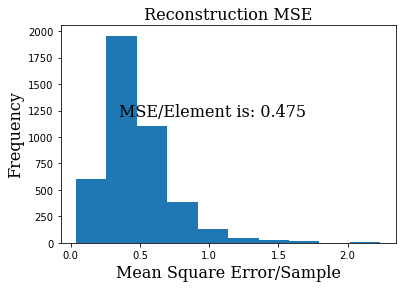

In [56]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

# reconstruction performance

#recon = vae.predict(scaled_X_test)
recon_loss_1 = ((scaled_exp_data_df.values - rec) ** 2).mean(axis=1)
plt.hist(recon_loss_1)
plt.title(' Reconstruction MSE ', fontdict=font)
recon_loss = ((scaled_exp_data_df.values - rec) ** 2).mean(axis=None)
format_float = "{:.3f}".format(recon_loss)
print_text='MSE/Element is: '+str(format_float)
xpos=0.4
ytop=1200
ystep=200
plt.text(xpos-0.05, ytop, print_text, fontdict=font)
#plt.text(xpos, ytop-ystep, '3 Factors', fontdict=font)
#plt.text(xpos, ytop-ystep*2,  ' Middle Layer Nodes', fontdict=font)
plt.xlabel('Mean Square Error/Sample', fontdict=font)
plt.ylabel('Frequency', fontdict=font)
print('MSE is:', recon_loss)

plt.show()
#plt.savefig('Big3LinearMSEHist1.png')

In [ ]:
# UMAP for data
data_umap = umap.UMAP(n_neighbors=5, min_dist=.1)
embedding_org = pd.DataFrame(data_umap.fit_transform(exp_data), columns = ['UMAP1','UMAP2'])
sns_plot = sn.scatterplot(x='UMAP1', y='UMAP2', data=embedding_org)

In [ ]:
loss,_  = vae.evaluate(scaled_X_test, scaled_X_test, batch_size=64, verbose=0)

print('Test loss vae:', loss)


In [ ]:
decoder.save('Big4DecoderLinearGood1.h5')
encoder.save('Big4EncoderLinearGood1.h5')


In [ ]:
#from tensorflow import keras
decoder=keras.models.load_model('Big5DecoderLinearGood1.h5')
encoder=keras.models.load_model('Big5EncoderLinearGood1.h5')


#new_vae = keras.models.load_model('Big5To3FactorVae')

In [ ]:
encoder.summary()
decoder.summary()

In [ ]:
latent_pred_sample = encoder.predict(scaled_exp_data)[0]
out=decoder.predict(latent_pred_sample)
indata=pd.DataFrame(data=scaled_exp_data, columns=col_names)
inout=pd.DataFrame(data=out, columns=col_names)
inout.insert(0,"F0",latent_pred_sample[:,0],True)
inout.insert(1,"F1",latent_pred_sample[:,1],True)
inout.insert(2,"F2",latent_pred_sample[:,2],True)
inout.insert(3,"F3",latent_pred_sample[:,3],True)
inout.insert(4,"F4",latent_pred_sample[:,4],True)
inout.insert(5,"F5",latent_pred_sample[:,5],True)
inout

In [ ]:
col='O3'
fac=4;
plt.scatter(inout.iloc[:,fac],inout[col],s=0.1);
  #plt.xlim(-2, 2)
plt.ylim(-3, 3)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='red')
plt.show()
plt.scatter(indata[col], inout[col],s=1);
plt.ylim(-1.5, 1.5)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='red')
plt.show()
indata[col].corr(inout[col]) 
#inout.iloc[:,fac].corr(inout[col])

In [ ]:
ffCorr=inout.corr()

corrF0=ffCorr.iloc[0,latent_dim:50+latent_dim]
corrF1=ffCorr.iloc[1,latent_dim:50+latent_dim]
corrF2=ffCorr.iloc[2,latent_dim:50+latent_dim]
corrF3=ffCorr.iloc[3,latent_dim:50+latent_dim]
corrF4=ffCorr.iloc[4,latent_dim:50+latent_dim]
corrF5=ffCorr.iloc[5,latent_dim:50+latent_dim]

ffCorr

In [ ]:
ffCorr.to_csv('Big3ffCorrGood2.csv', index=True, header=True)

In [ ]:
corrF0abs=corrF0.abs()
corrF0abs.sort_values(axis = 0, ascending = False, inplace = True, na_position ='last')
index=corrF0abs[corrF0abs>0.2].index
sortCorrF0=corrF0.loc[index]
sortCorrF0

In [ ]:
corrF1abs=corrF1.abs()
corrF1abs.sort_values(axis = 0, ascending = False, inplace = True, na_position ='last')
index=corrF1abs[corrF1abs>0.2].index
sortCorrF1=corrF1.loc[index]
sortCorrF1

In [ ]:
corrF2abs=corrF2.abs()
corrF2abs.sort_values(axis = 0, ascending = False, inplace = True, na_position ='last')
index=corrF2abs[corrF2abs>0.1].index
sortCorrF2=corrF2.loc[index]
sortCorrF2*(-1)

In [ ]:
corrF3abs=corrF3.abs()
corrF3abs.sort_values(axis = 0, ascending = False, inplace = True, na_position ='last')
index=corrF3abs[corrF3abs>0.2].index
sortCorrF3=corrF3.loc[index]
sortCorrF3

In [ ]:
corrF4abs=corrF4.abs()
corrF4abs.sort_values(axis = 0, ascending = False, inplace = True, na_position ='last')
index=corrF4abs[corrF4abs>0.2].index
sortCorrF4=corrF4.loc[index]
sortCorrF4

In [ ]:
corrF5abs=corrF5.abs()
corrF5abs.sort_values(axis = 0, ascending = False, inplace = True, na_position ='last')
index=corrF5abs[corrF5abs>0.2].index
sortCorrF5=corrF5.loc[index]
sortCorrF5

In [ ]:
# correlation for latent components
latent_pred = encoder.predict(exp_data)[0]
corr_df = pd.DataFrame(data=latent_pred)
corr = corr_df.corr()
sn.clustermap(corr, cmap='bwr', center=0)
print(corr)

In [ ]:
# UMAP for latent space
latent_pred = encoder.predict(exp_data)[0]
data_umap = umap.UMAP(n_neighbors=5, min_dist=.1)
embedding = pd.DataFrame(data_umap.fit_transform(latent_pred), columns=['UMAP1', 'UMAP2'])
#sns_plot = sn.scatterplot(x='UMAP1', y='UMAP2', data=embedding)

In [ ]:
 # curve NELBO
golden_size = lambda width: (width, 2. * width / (1 + np.sqrt(5)))
fig, ax = plt.subplots(figsize=golden_size(6))
hist_vae = {k:hist.history[k] for k in ('loss', 'val_loss')}
hist_vae_df = pd.DataFrame(hist_vae)
hist_vae_df.plot(ax=ax)

ax.set_ylabel('NELBO')
ax.set_xlabel('# epochs')

ax.set_ylim(.99 * hist_vae_df[1:].values.min(),
            1.1 * hist_vae_df[1:].values.max())

In [ ]:
embedding.iloc[:, 0]

In [ ]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(embedding)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(embedding)


In [ ]:
plt.scatter(embedding.iloc[:,0], embedding.iloc[:,1], c=kmeans.labels_[:], s=5, cmap='Spectral');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='red')
plt.show()

In [ ]:
kmeans.labels_[:]

In [ ]:
 plt.hist(latent_pred)

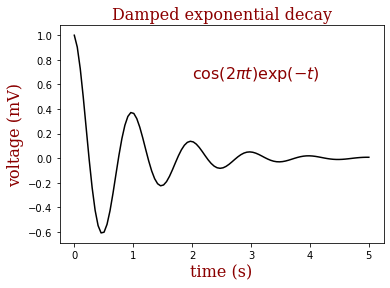

In [15]:
import numpy as np
import matplotlib.pyplot as plt


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

x = np.linspace(0.0, 5.0, 100)
y = np.cos(2*np.pi*x) * np.exp(-x)

plt.plot(x, y, 'k')
plt.title('Damped exponential decay', fontdict=font)
plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$', fontdict=font)
plt.xlabel('time (s)', fontdict=font)
plt.ylabel('voltage (mV)', fontdict=font)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

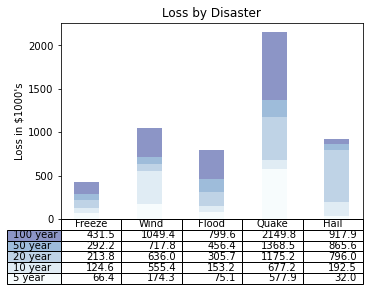

In [14]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[0.73 0.66 0.62 0.59 0.57 0.55 0.53 0.52 0.51 0.5  0.5  0.49 0.48 0.48]


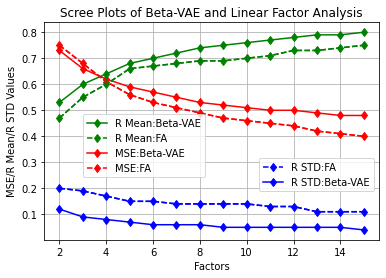

In [102]:
VAE = [[ 0.73, 0.53,  0.12],
       [ 0.66, 0.60,  0.09],
       [ 0.62, 0.64,  0.08],
       [ 0.59, 0.68,  0.07],    
       [ 0.57, 0.70,  0.06],
       [ 0.55, 0.72,  0.06],
       [ 0.53, 0.74,  0.06],
       [ 0.52, 0.75,  0.05],
       [ 0.51, 0.76,  0.05],
       [ 0.50, 0.77,  0.05],
       [ 0.50, 0.78,  0.05],
       [ 0.49, 0.79,  0.05],
       [ 0.48, 0.79,  0.05],
       [ 0.48, 0.80,  0.04]]
PCA = [[ 0.75, 0.47,  0.20],
       [ 0.68, 0.55,  0.19],
       [ 0.61, 0.60,  0.17],
       [ 0.56, 0.66,  0.15],    
       [ 0.53, 0.67,  0.15],
       [ 0.51, 0.68,  0.14],
       [ 0.49, 0.69,  0.14],
       [ 0.47, 0.69,  0.14],
       [ 0.46, 0.70,  0.14],
       [ 0.45, 0.71,  0.13],
       [ 0.44, 0.73,  0.13],
       [ 0.42, 0.73,  0.11],
       [ 0.41, 0.74,  0.11],
       [ 0.40, 0.75,  0.11]]


columns = ('MSE', 'R', 'Std R')
rows = ['%d nodes' % x for x in range(2,15)]
x = range(2,16)
xnp=np.array(x)
print(xnp)
vae=np.array(VAE)
pca=np.array(PCA)
print(vae[:,0])



vmse,=plt.plot(xnp,vae[:,0], 'r-d',label='MSE:Beta-VAE')
fmse,=plt.plot(xnp,pca[:,0], 'r--d',label='MSE:FA')

vr,=plt.plot(xnp,vae[:,1],'g-d',label='R Mean:Beta-VAE')
fr,=plt.plot(xnp,pca[:,1],'g--d',label='R Mean:FA')

vrstd,=plt.plot(xnp,vae[:,2],'b-d',label='R STD:Beta-VAE')
frstd,=plt.plot(xnp,pca[:,2],'b--d',label='R STD:FA')

plt.plot(xnp, pca[:,0], 'r',xnp,pca[:,1],'g',xnp,pca[:,2],'b',linestyle='--''')

#l1 = plt.legend([(vmse, fmse)], ['VAE and FA MSE '], numpoints=1,[(vr, fr)], ['VAE and FA R '], numpoints=1)
first_legend=plt.legend(handles=[vr,fr,vmse,fmse], bbox_to_anchor=(0.1, 0.6))
plt.gca().add_artist(first_legend)
plt.legend(handles=[frstd,vrstd], bbox_to_anchor=(1, 0.2),loc='lower right')


plt.title('Scree Plots of Beta-VAE and Linear Factor Analysis')
plt.xlabel('Factors')
plt.ylabel('MSE/R Mean/R STD Values')
plt.grid()
plt.savefig('ScreePlotMSE-R-STD.jpeg')